In [1]:
import matplotlib.pyplot as plt
import time
import numpy as np
from scipy.spatial import distance

In [2]:
def defineParameters():

    # Let's say our weights are 0.2 and 0.4
    w = [0.1, 0.4]
    w = np.array(w)
    learningRate = 0.01
    epsilon = 0.0001
    
    return w, learningRate, epsilon

In [3]:
def gradientDescent(weights, eta, epsilon):

    xVector = []
    yVector = []
    energyList = []

    flag = True
    while flag == True:

        condition = ((weights[0] + weights[1] < 1) and (weights[0] > 0) and (weights[1] > 0))

        if condition != True:

            break

        else:

            energyFunction = - (np.log(1 - weights[0] - weights[1])) - (np.log(weights[0]))- (np.log(weights[1]))
            
            gradient = [(1 / (1 - weights[0] - weights[1])) - (1 / weights[0]), (1 / (1 - weights[0] - weights[1])) - (1 / weights[1])]
            gradient = np.array(gradient)
            energyList.append(energyFunction)

            previousPoints = weights
            weights = np.subtract(weights, (np.multiply(eta,gradient)))

            prevDistWithCurrent = distance.euclidean(previousPoints, weights)
            if prevDistWithCurrent <= epsilon:
                flag = False

            xVector.append(weights[0])
            yVector.append(weights[1])

    print("Final weights : {}\n".format(weights))

        
    # Plot the Trajectory
    plt.title("Trajectory Plot")
    plt.xlabel("X Points")
    plt.ylabel("Y Points")
    plt.plot(xVector, yVector, color='green') 
    plt.show(True)

    # Plot the Energy-Epoch plot
    plt.title("Energy-Epoch Plot")
    plt.xlabel("Epoch")
    plt.ylabel("Energy")
    plt.scatter(range(len(energyList)), energyList)
    plt.show(True)

In [4]:
def newtonsMethod(weights, eta, epsilon):
    xVector = []
    yVector = []
    energyList = []

    flag = True
    while flag == True:

        condition = ((weights[0] + weights[1] < 1) and (weights[0] > 0) and (weights[1] > 0))

        if condition != True:

            break

        else:

            energyFunction = - (np.log(1 - weights[0] - weights[1])) - (np.log(weights[0]))- (np.log(weights[1]))
            
            gradient = [(1 / (1 - weights[0] - weights[1])) - (1 / weights[0]), (1 / (1 - weights[0] - weights[1])) - (1 / weights[1])]
            gradient = np.array(gradient)
            energyList.append(energyFunction)
            previousPoints = weights
            h = [ [(1 / ((1 - weights[0] - weights[1]) ** 2)) + (1 / (weights[0] ** 2)), (1 / ((1 - weights[0] - weights[1]) ** 2))],
                [(1 / ((1 - weights[0] - weights[1]) ** 2)), (1 / ((1 - weights[0] - weights[1]) ** 2)) + (1 / (weights[1] ** 2))]]
            
            invH = np.linalg.inv(np.array(h))

            
            weights = np.subtract(weights, np.dot(np.multiply(invH, eta), gradient))
            
            prevDistWithCurrent = distance.euclidean(previousPoints, weights)
            if prevDistWithCurrent <= epsilon:
                flag = False

            xVector.append(weights[0])
            yVector.append(weights[1])

    print("Final weights : {}\n".format(weights))

        
    
    # Plot the Trajectory
    plt.title("Trajectory Plot")
    plt.xlabel("X Points")
    plt.ylabel("Y Points")
    plt.plot(xVector, yVector, color='green') 
    plt.show(True)

    # Plot the Energy-Epoch plot
    plt.title("Energy-Epoch Plot")
    plt.xlabel("Epoch")
    plt.ylabel("Energy")
    plt.scatter(range(len(energyList)), energyList)
    plt.show(True)

In [5]:
weights, learningRate, epsilon = defineParameters()
print("Initial Weights : {} \nInitial Learning Rate : {} \nBreaking Point : {}\n".format(weights, learningRate, epsilon))


Initial Weights : [0.1 0.4] 
Initial Learning Rate : 0.01 
Breaking Point : 0.0001



Gradient Descent Evaluations
Final weights : [0.3326686 0.3340005]



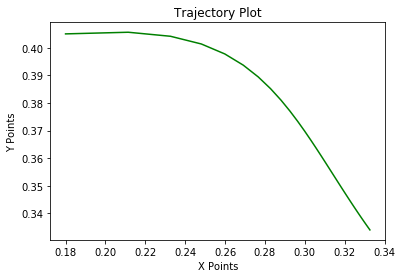

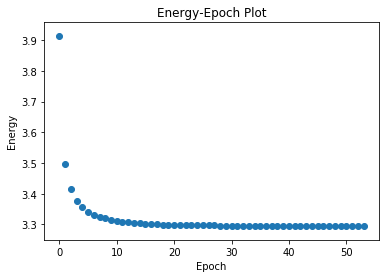

In [6]:
print("Gradient Descent Evaluations")
t1 = time.time()
gradientDescent(weights, learningRate, epsilon)
t2 = time.time()

Newtons Method Evaluations
Final weights : [0.32423561 0.33743072]



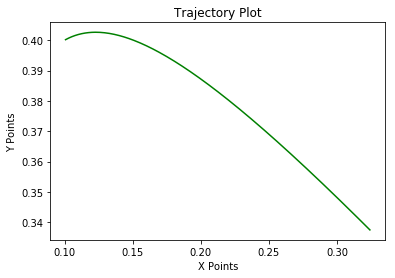

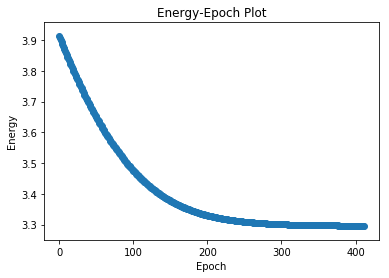

In [7]:
weights, learningRate, epsilon = defineParameters()
print("Newtons Method Evaluations")
t3 = time.time()
newtonsMethod(weights, learningRate, epsilon)
t4 = time.time()

In [8]:
# Time Evaluations
gradientDescentTime = t2 - t1
newtonMethodTime = t4 - t3
print("Gradient Descent Time : {} \nNewtons Method Time : {}".format(gradientDescentTime, newtonMethodTime))

Gradient Descent Time : 0.22815990447998047 
Newtons Method Time : 0.2529592514038086
